# Logistic Regression to aid in Feature Selection 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading in data 
df = pd.read_csv("data/train.csv")
# Note that y contains binary label indicating if mid_price goes up 
# in next timestep (y = 1) or not (0). Output probability of mid_price
# going up. 

In [8]:
df.columns = list(df.columns.values)

In [10]:
df_num_corr = df.corr()['y'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.01].sort_values(ascending=False)
print("There are {} features decently correlated w/ mid price:\n{}".format(len(golden_features_list), golden_features_list))


There are 21 features decently correlated w/ mid price:
bid1vol                 0.086308
transacted_qty          0.056453
closed_position_qty     0.046323
opened_position_qty     0.032599
bid2vol                 0.029456
last_price              0.019276
ask5                    0.019128
ask4                    0.019119
ask3                    0.019109
ask2                    0.019092
bid4                    0.018991
bid3                    0.018990
bid5                    0.018989
bid2                    0.018984
ask1                    0.018978
mid                     0.018940
bid1                    0.018901
id                      0.014694
d_open_interest        -0.015503
ask2vol                -0.025560
ask1vol                -0.126212
Name: y, dtype: float64


In [22]:
# Dropping closed_position_qty  0.046323, opened_position_qty  0.032599
# df.count() doesn't count NaN valus 
df.drop(columns=['closed_position_qty', 'opened_position_qty '], inplace=True)

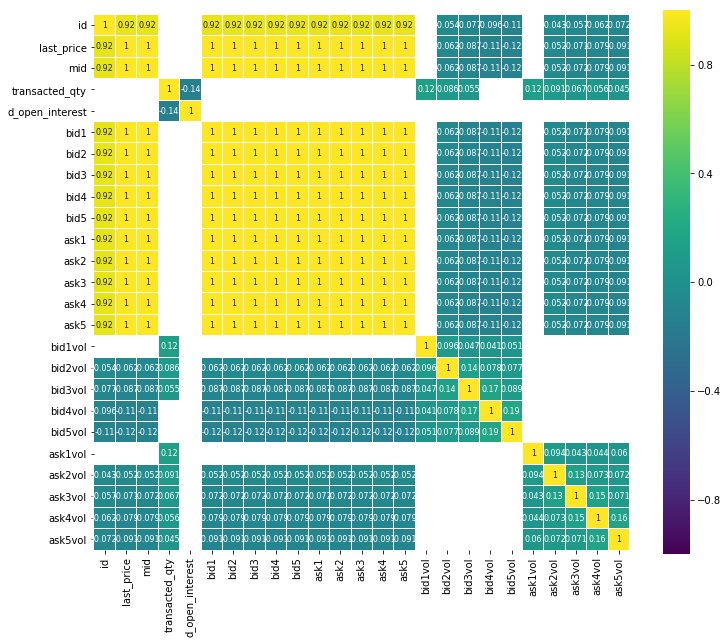

In [28]:
corr = df.drop('y', axis=1).corr() # We already examined y correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.04) | (corr <= -0.04)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Analyzing the correlation above: It looks like both mid_price and last_price are highly correlated with 
one another, and both are perfectly correlated [bid1, bid2,  ... bid5,ask1, ... ask5], which indicates that
we may want to drop many or all of [bid1, bid2,  ... bid5,ask1, ... ask5] and one of [mid_price, last_price]
to avoid extreme multicollinearity in a linear model. For non-linear, this is not so clear. 

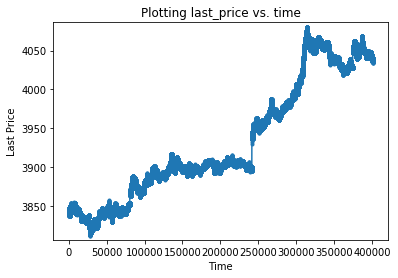

In [15]:
fig = plt.figure()
plt.title('Plotting last_price vs. time')
#plt.plot(N, L1, marker = '.', color='pink', linewidth = 1.5)
#plt.legend(('Eta 1e-6'), loc = 'upper right')
#plt.legend(('Training Error', 'Validation Error'), loc = 'upper right')
plt.xlabel('Time')
plt.ylabel('Last Price')
plt.margins(y=0.02)

plt.plot(train_data["id"], train_data["last_price"], marker = '.', linewidth = 1.5)


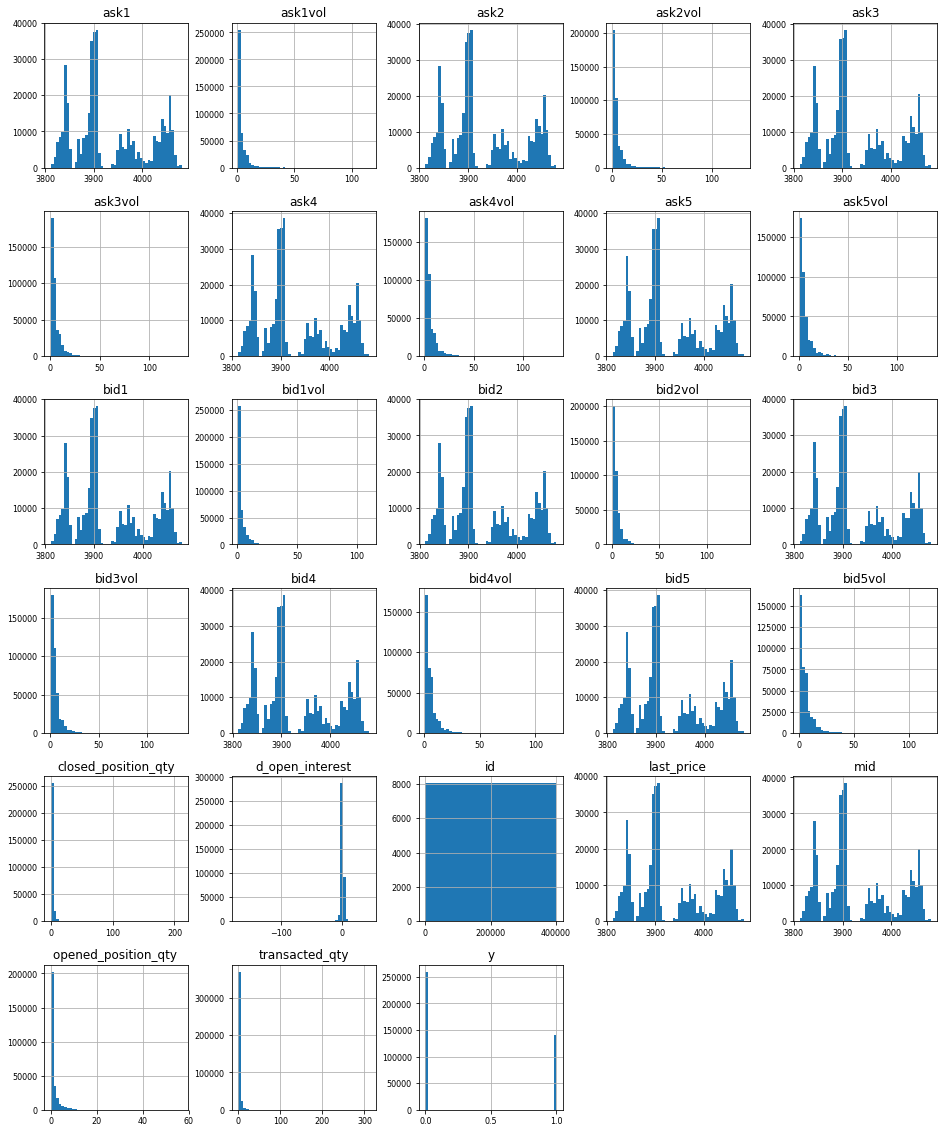

In [20]:
train_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
# Random Forest? (ensemble forest)
# SVM 
# Naive Bayes 
#data_corr = 